In [ ]:
!pip install tensorflow openpyxl

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
drive.mount('/content/drive')
file_path = 'change to your xlsx file path'

Mounted at /content/drive


# 6個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 64, 'lr': 0.005, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_subscribers")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_subscribers")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 1197.38
Test R² Score: 0.80
April RMSE: 1948.71
April R²: 0.35


In [ ]:
y_april_pred_actual_series

,0
tonyhuang38,3687.326412
27apt,3688.091915
campfiretw,2376.823944
caitaitai945,1183.749592
keatfilms9821,881.907375
...,...
yuniquecc,3511.621105
0323matzu,889.134367
theliupei,-223.700801
aikygo,1890.755402


In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.500
標準化折扣累積增益 (NDCG) 前 10%: 0.959


## 匯出預測訂閱數

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 將其轉為 DataFrame 並重新命名欄位
df = y_april_pred_actual_series.reset_index()
df.columns = ['creator_handle', 'score']

scaler = StandardScaler()
# Step 3: 根據 score 值由高到低排序
df_sorted = df.sort_values(by='score', ascending=False)
scaler = StandardScaler()

# 對欄位 標準化
df_sorted['score'] = scaler.fit_transform(df_sorted[['score']])
# Step 4: 設定輸出路徑（儲存在雲端硬碟中）
output_path = 'change to your path/april_lstm6subscribers_predictions.xlsx'

# Step 5: 輸出為 Excel 檔案
df_sorted.to_excel(output_path, index=False)

# Step 6: 確認是否成功儲存
if os.path.exists(output_path):
    print(f"✅ 成功儲存到：{output_path}")
else:
    print("❌ 儲存失敗，請檢查路徑是否正確")

✅ 成功儲存到：/content/drive/MyDrive/機器學習小組/april_lstm6subscribers_predictions.xlsx


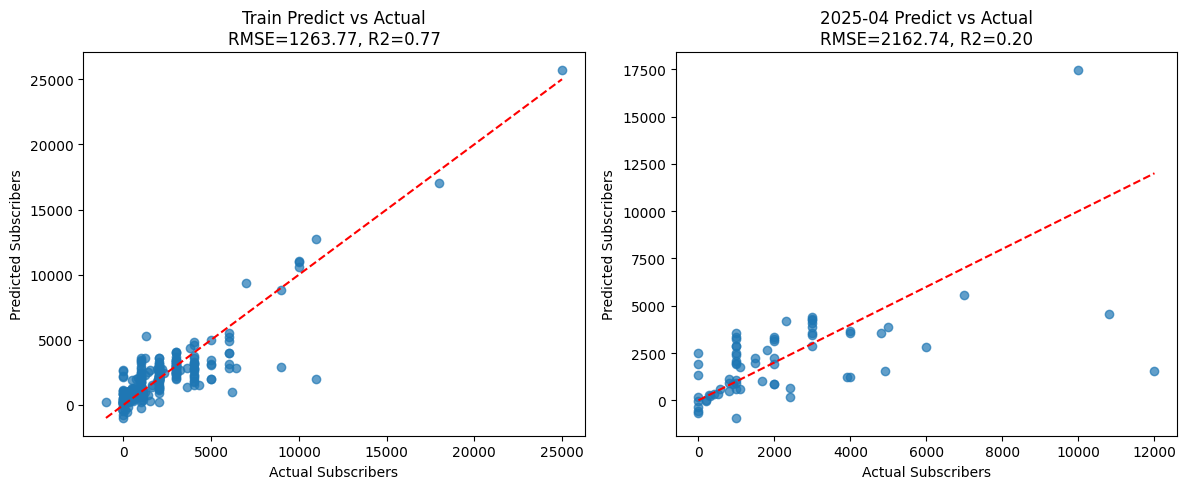

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.tight_layout()
plt.show()

In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
31,rondoyoyo,"11,000","2,001","8,999"
271,yuniquecc,"9,000","2,941","6,059"
218,6artstv,"6,200",961,"5,239"
39,just_be_joyce,"1,300","5,284","3,984"
161,gloryandy,"6,400","2,849","3,551"
85,allieallie,"6,000","2,820","3,180"
62,taiwango2020,"5,000","1,991","3,009"
76,highaday,"5,000","2,012","2,988"
231,nowyouon,"6,000","3,104","2,896"
92,gloryandy,"4,300","1,538","2,762"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
31,rondoyoyo,"12,000","1,548","10,452"
32,terry-films,"10,000","17,482","7,482"
11,6artstv,"10,800","4,575","6,225"
42,hard2men1213,"4,900","1,524","3,376"
24,nowyouon,"6,000","2,833","3,167"
3,caitaitai945,"4,000","1,240","2,760"
39,just_be_joyce,"3,900","1,237","2,663"
0,tonyhuang38,"1,000","3,546","2,546"
25,smilevlogtaiwan,0,"2,502","2,502"
55,asaburu,"1,000","3,345","2,345"


# 9個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 64, 'lr': 0.005, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_subscribers")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_subscribers")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 1280.44
Test R² Score: 0.78
April RMSE: 1903.22
April R²: 0.38


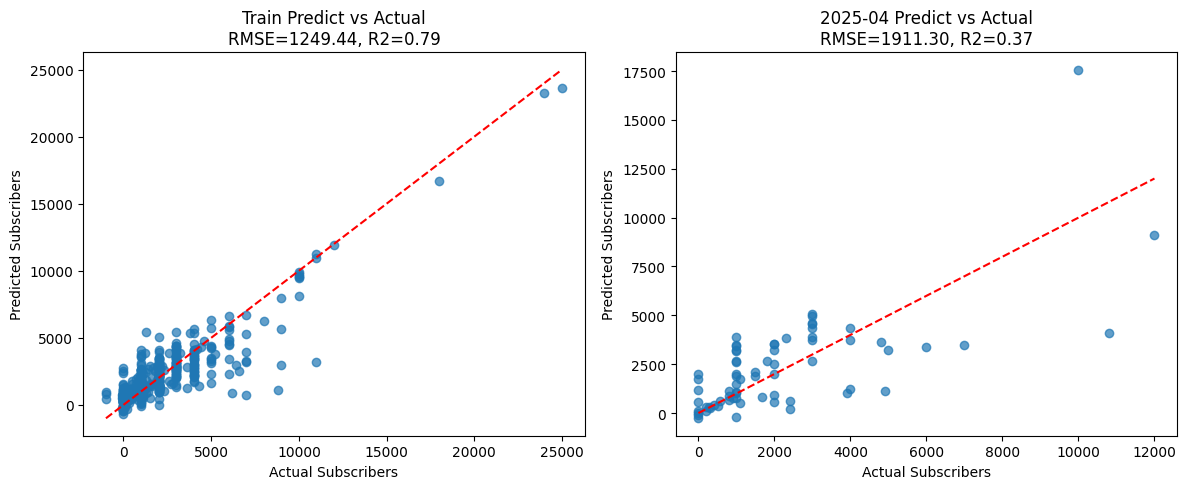

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.tight_layout()
plt.show()

In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.333
標準化折扣累積增益 (NDCG) 前 10%: 0.949


## 匯入預測訂閱數

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 將其轉為 DataFrame 並重新命名欄位
df = y_april_pred_actual_series.reset_index()
df.columns = ['creator_handle', 'score']

scaler = StandardScaler()
# Step 3: 根據 score 值由高到低排序
df_sorted = df.sort_values(by='score', ascending=False)
scaler = StandardScaler()

# 對欄位 標準化
df_sorted['score'] = scaler.fit_transform(df_sorted[['score']])
# Step 4: 設定輸出路徑（儲存在雲端硬碟中）
output_path = 'change to your path/april_lstm9subscribers_predictions.xlsx'

# Step 5: 輸出為 Excel 檔案
df_sorted.to_excel(output_path, index=False)

# Step 6: 確認是否成功儲存
if os.path.exists(output_path):
    print(f"✅ 成功儲存到：{output_path}")
else:
    print("❌ 儲存失敗，請檢查路徑是否正確")

✅ 成功儲存到：/content/drive/MyDrive/機器學習小組/april_lstm9subscribers_predictions.xlsx


In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
238,rondoyoyo,"11,000","3,197","7,803"
75,deliciousthirsty,"8,800","1,096","7,704"
94,smilevlogtaiwan,"7,000",705,"6,295"
478,yuniquecc,"9,000","2,981","6,019"
425,6artstv,"6,200",869,"5,331"
246,just_be_joyce,"1,300","5,411","4,111"
177,just_be_joyce,"6,600","2,528","4,072"
59,yoshidajapantv,"7,000","3,191","3,809"
292,allieallie,"6,000","2,288","3,712"
28,celineswaytravel,"7,000","3,307","3,693"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
32,terry-films,"10,000","17,575","7,575"
11,6artstv,"10,800","4,076","6,724"
42,hard2men1213,"4,900","1,126","3,774"
33,ktstory,"7,000","3,492","3,508"
0,tonyhuang38,"1,000","3,913","2,913"
31,rondoyoyo,"12,000","9,131","2,869"
39,just_be_joyce,"3,900","1,050","2,850"
3,caitaitai945,"4,000","1,222","2,778"
24,nowyouon,"6,000","3,361","2,639"
55,asaburu,"1,000","3,474","2,474"


# 12個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]

In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,0.040374,-0.186145,-0.011904,-0.149731,-0.123931,...,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,-0.332434,-0.380862,-0.109438,-0.184032,-0.178069,...,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,-0.334534,-0.429541,-0.081162,-0.264068,-0.167385,...,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,-0.356877,-0.429541,-0.167829,-0.264068,-0.197820,...,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,-0.084696,-0.429541,0.019978,-0.264068,-0.127907,...,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,0.047318,-0.903657,0.112338,-0.436608,0.082131,-0.347988,-0.186145,-0.177579,-0.035395,-0.151913,...,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.419493,-0.517106,-0.466983,-0.430416,-0.486165,-0.480348,-0.551239,-0.214583,-0.275501,-0.212669,...,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.666629,-0.159704,-0.785609,-0.408384,-0.668020,-0.478735,-0.672937,-0.085358,-0.378404,-0.138972,...,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 64, 'lr': 0.005, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_subscribers")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_subscribers")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 1523.13
Test R² Score: 0.86
April RMSE: 1832.03
April R²: 0.42


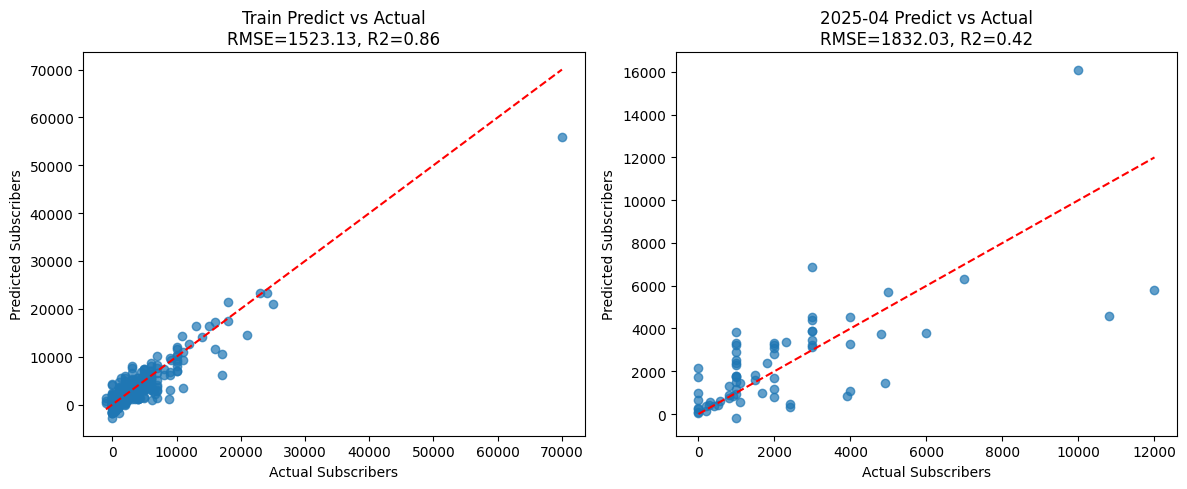

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.tight_layout()
plt.show()

In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.500
標準化折扣累積增益 (NDCG) 前 10%: 0.948


## 匯入預測訂閱數

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 將其轉為 DataFrame 並重新命名欄位
df = y_april_pred_actual_series.reset_index()
df.columns = ['creator_handle', 'score']

scaler = StandardScaler()
# Step 3: 根據 score 值由高到低排序
df_sorted = df.sort_values(by='score', ascending=False)
scaler = StandardScaler()

# 對欄位 標準化
df_sorted['score'] = scaler.fit_transform(df_sorted[['score']])
# Step 4: 設定輸出路徑（儲存在雲端硬碟中）
output_path = 'change to your path/april_lstm12subscribers_predictions.xlsx'

# Step 5: 輸出為 Excel 檔案
df_sorted.to_excel(output_path, index=False)

# Step 6: 確認是否成功儲存
if os.path.exists(output_path):
    print(f"✅ 成功儲存到：{output_path}")
else:
    print("❌ 儲存失敗，請檢查路徑是否正確")

✅ 成功儲存到：/content/drive/MyDrive/機器學習小組/april_lstm12subscribers_predictions.xlsx


In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
170,terry-films,"70,000","55,857","14,143"
85,allieallie,"17,000","6,181","10,819"
282,deliciousthirsty,"8,800","1,144","7,656"
445,rondoyoyo,"11,000","3,489","7,511"
102,ktstory,"21,000","14,562","6,438"
24,nowyouon,"17,000","10,567","6,433"
685,yuniquecc,"9,000","3,019","5,981"
301,smilevlogtaiwan,"7,000","1,273","5,727"
632,6artstv,"6,200",876,"5,324"
189,u1.yuitube,"3,000","8,001","5,001"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
11,6artstv,"10,800","4,595","6,205"
31,rondoyoyo,"12,000","5,798","6,202"
32,terry-films,"10,000","16,108","6,108"
64,yuniquecc,"3,000","6,881","3,881"
42,hard2men1213,"4,900","1,443","3,457"
39,just_be_joyce,"3,900",851,"3,049"
3,caitaitai945,"4,000","1,090","2,910"
0,tonyhuang38,"1,000","3,854","2,854"
55,asaburu,"1,000","3,320","2,320"
61,vietnamjohnny,"1,000","3,242","2,242"


# 6個月交叉驗證版本+調參

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.3759


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.3054
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.2091
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.3161


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.3263


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.3614
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: 0.2772


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: 0.2979


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test RMSE: 1484.69
Test R² Score: 0.68
April RMSE: 1798.76
April R²: 0.45


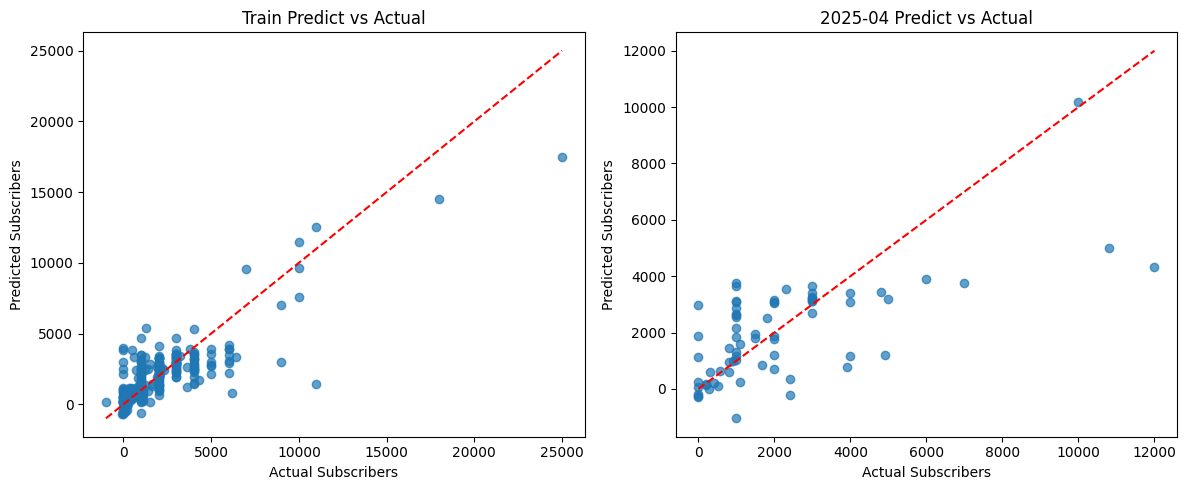

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.833
標準化折扣累積增益 (NDCG) 前 10%: 0.976


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))



訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
31,rondoyoyo,"11,000","1,399","9,601"
33,ktstory,"25,000","17,462","7,538"
271,yuniquecc,"9,000","3,000","6,000"
218,6artstv,"6,200",825,"5,375"
39,just_be_joyce,"1,300","5,364","4,064"
32,terry-films,0,"3,979","3,979"
239,terry-films,0,"3,818","3,818"
85,allieallie,"6,000","2,201","3,799"
12,realchina,"1,000","4,660","3,660"
100,rondoyoyo,"18,000","14,546","3,454"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
31,rondoyoyo,"12,000","4,331","7,669"
11,6artstv,"10,800","5,005","5,795"
42,hard2men1213,"4,900","1,214","3,686"
33,ktstory,"7,000","3,743","3,257"
39,just_be_joyce,"3,900",770,"3,130"
25,smilevlogtaiwan,0,"2,985","2,985"
3,caitaitai945,"4,000","1,158","2,842"
0,tonyhuang38,"1,000","3,775","2,775"
16,allieallie,"1,000","3,660","2,660"
48,twobears,"2,400",-216,"2,616"


# 9個月交叉驗證版本+調參

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.2950


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.3003


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.2136


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.1462


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.2741


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.2711


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: 0.1898


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: 0.1478


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test RMSE: 1768.62
Test R² Score: 0.57
April RMSE: 1688.63
April R²: 0.51


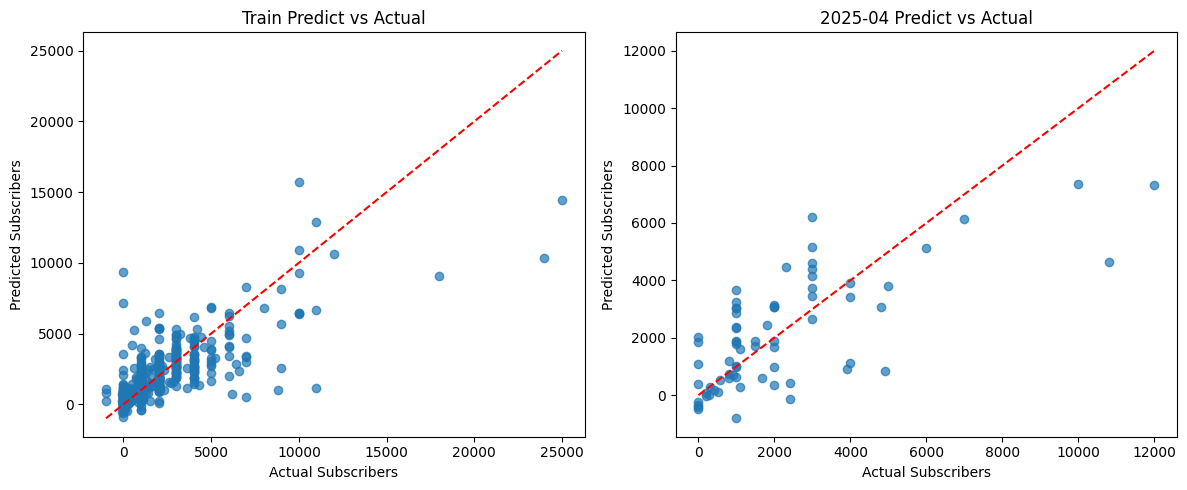

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.667
標準化折扣累積增益 (NDCG) 前 10%: 0.969


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))



訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
102,ktstory,"24,000","10,322","13,678"
240,ktstory,"25,000","14,465","10,535"
238,rondoyoyo,"11,000","1,153","9,847"
239,terry-films,0,"9,340","9,340"
307,rondoyoyo,"18,000","9,098","8,902"
75,deliciousthirsty,"8,800","1,008","7,792"
446,terry-films,0,"7,132","7,132"
94,smilevlogtaiwan,"7,000",481,"6,519"
478,yuniquecc,"9,000","2,596","6,404"
101,terry-films,"10,000","15,707","5,707"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
11,6artstv,"10,800","4,653","6,147"
31,rondoyoyo,"12,000","7,310","4,690"
42,hard2men1213,"4,900",843,"4,057"
64,yuniquecc,"3,000","6,199","3,199"
39,just_be_joyce,"3,900",903,"2,997"
3,caitaitai945,"4,000","1,115","2,885"
0,tonyhuang38,"1,000","3,677","2,677"
32,terry-films,"10,000","7,348","2,652"
48,twobears,"2,400",-140,"2,540"
16,allieallie,"1,000","3,244","2,244"


In [ ]:
# === 儲存預測結果至雲端硬碟 ===

# 建立 DataFrame（包含創作者名稱、實際值與預測值）
results_df = pd.DataFrame({
    'creator_handle': creator_april,
    'Actual_Subscribers_2025_04': y_april_actual,
    'Predicted_Subscribers_2025_04': y_april_pred_actual
})

# 顯示前幾列確認正確
display(results_df.head())

# 指定儲存路徑：與 new_travel.xlsx 相同的資料夾
save_path = 'change to your path/subscribers_predict.csv'

# 儲存為 CSV
results_df.to_csv(save_path, index=False)

# 顯示確認訊息
print(f"✅ 預測結果已儲存至: {save_path}")
display(results_df.head(10))

,creator_handle,Actual_Subscribers_2025_04,Predicted_Subscribers_2025_04
0,tonyhuang38,1000.0,3677.198516
1,27apt,4800.0,3088.158758
2,campfiretw,1000.0,2383.957498
3,caitaitai945,4000.0,1114.663694
4,keatfilms9821,1000.0,1029.213223


✅ 預測結果已儲存至: /content/drive/MyDrive/機器學習小組/subscribers_predict.csv


,creator_handle,Actual_Subscribers_2025_04,Predicted_Subscribers_2025_04
0,tonyhuang38,1000.0,3677.198516
1,27apt,4800.0,3088.158758
2,campfiretw,1000.0,2383.957498
3,caitaitai945,4000.0,1114.663694
4,keatfilms9821,1000.0,1029.213223
5,itravelgo,1000.0,-807.223601
6,deliciousthirsty,300.0,288.761446
7,highaday,1000.0,2849.493803
8,zoebitalk,3000.0,2658.614648
9,foodadventure,2000.0,990.713368


# 12個月交叉驗證版本+調參

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,3000,1265214,2000,1231154,4000,1447236,2000,991758,2000,894392,...,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,700,328885,1100,502659,1400,649359,1200,633065,1700,503433,...,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,0,609998,2000,619214,1000,644864,1000,737051,1000,580588,...,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,678782,1000,516446,1000,597046,1000,418324,1000,360793,...,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,1676109,2000,887819,2000,1179563,1000,1109007,1000,865679,...,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2600,-83502,3100,438050,3300,616071,2000,382466,3000,692321,...,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,900,466128,1100,450602,800,332796,500,246380,900,253562,...,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,974311,0,495264,0,336247,0,721623,0,785773,...,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,0.040374,-0.186145,-0.011904,-0.149731,-0.123931,...,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,-0.332434,-0.380862,-0.109438,-0.184032,-0.178069,...,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,-0.334534,-0.429541,-0.081162,-0.264068,-0.167385,...,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,-0.356877,-0.429541,-0.167829,-0.264068,-0.197820,...,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,-0.084696,-0.429541,0.019978,-0.264068,-0.127907,...,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,0.047318,-0.903657,0.112338,-0.436608,0.082131,-0.347988,-0.186145,-0.177579,-0.035395,-0.151913,...,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.419493,-0.517106,-0.466983,-0.430416,-0.486165,-0.480348,-0.551239,-0.214583,-0.275501,-0.212669,...,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.666629,-0.159704,-0.785609,-0.408384,-0.668020,-0.478735,-0.672937,-0.085358,-0.378404,-0.138972,...,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_subscribers"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.4986


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.5093


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.3394


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.3565


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.4955


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.4916


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: 0.3364


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: 0.3138


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_subscribers')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_subscribers")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test RMSE: 2775.19
Test R² Score: 0.54
April RMSE: 1745.95
April R²: 0.48


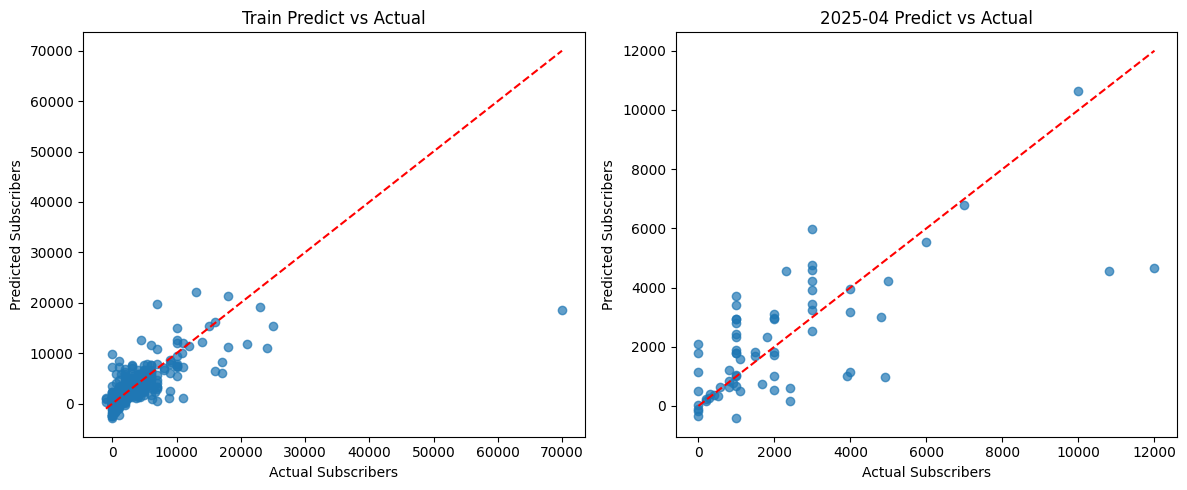

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.667
標準化折扣累積增益 (NDCG) 前 10%: 0.964


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_subscribers': y_train_actual,
    'predicted_subscribers': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_subscribers': '{:,.0f}',
    'predicted_subscribers': '{:,.0f}',
    'error': '{:,.0f}'
}))



訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
170,terry-films,"70,000","18,489","51,511"
309,ktstory,"24,000","11,105","12,895"
162,nowyouon,"7,000","19,810","12,810"
85,allieallie,"17,000","6,155","10,845"
446,terry-films,0,"9,920","9,920"
445,rondoyoyo,"11,000","1,196","9,804"
447,ktstory,"25,000","15,447","9,553"
183,lukasintaiwan,"16,000","6,517","9,483"
102,ktstory,"21,000","11,794","9,206"
154,allieallie,"13,000","22,112","9,112"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
31,rondoyoyo,"12,000","4,644","7,356"
11,6artstv,"10,800","4,556","6,244"
42,hard2men1213,"4,900",984,"3,916"
64,yuniquecc,"3,000","5,977","2,977"
39,just_be_joyce,"3,900","1,004","2,896"
3,caitaitai945,"4,000","1,154","2,846"
0,tonyhuang38,"1,000","3,707","2,707"
16,allieallie,"1,000","3,411","2,411"
48,twobears,"2,400",150,"2,250"
23,gloryandy,"2,300","4,544","2,244"
